In [2]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

First we will extract all the needed labels(GO term ID) from train_terms.tsv file. There are more than 40,000 labels. In order to simplify our model, we will choose the most frequent 1500 GO term IDs as labels.

In [3]:
train_terms = pd.read_csv("data/cafa-5-protein-function-prediction/Train/train_terms.tsv",sep="\t")
print(train_terms.shape)

(5363863, 3)


/var/folders/2w/ckrq97td6jg1frzm6lmgfc3c0000gn/T/ipykernel_95421/390216163.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)


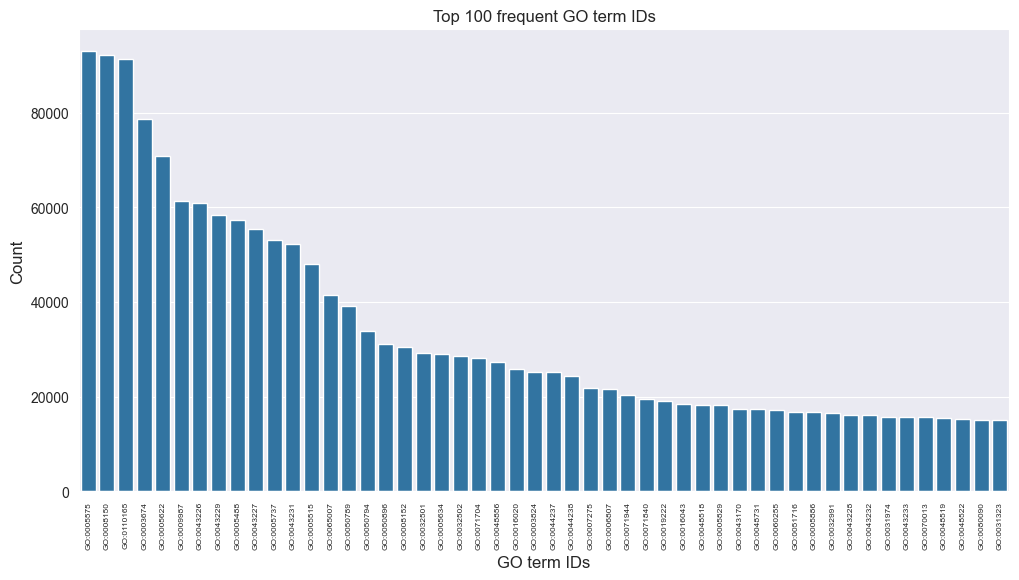

In [4]:

plot_df = train_terms['term'].value_counts().iloc[:50]
figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

Keep only 2000 most frequent GO  terms. 

In [5]:
number_of_labels = 2000
labels = train_terms['term'].value_counts().index[:number_of_labels].tolist()

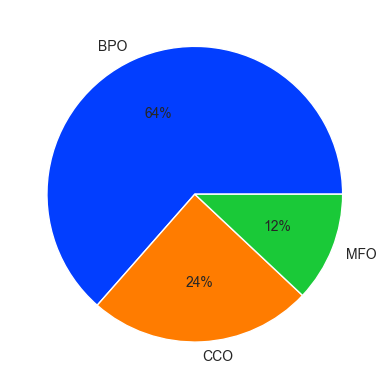

In [6]:
train_terms_updated = train_terms.loc[train_terms['term'].isin(labels)]
pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [7]:
train_terms_updated.head()

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
6,A0A009IHW8,GO:0044237,BPO


In [12]:
train_terms_updated.shape

(4597356, 3)

In [8]:
proteins_data_json = open("proteins_data.json")
proteins_data = json.load(proteins_data_json)

print(len(proteins_data))

142246


Create dataframe for all GO aspects

In [27]:

protein_ids = list(proteins_data.keys())

num_proteins = len(protein_ids)
train_labels = np.zeros((num_proteins, number_of_labels))

protein_to_index = {protein: idx for idx, protein in enumerate(protein_ids)}
go_term_to_index = {go: idx for idx, go in enumerate(labels)}

for protein_id, data in tqdm(proteins_data.items(), desc="Processing proteins"):
    protein_idx = protein_to_index[protein_id]
    for terms in data['GO'].values():
        for term in terms:
            if term in go_term_to_index:
                train_labels[protein_idx, go_term_to_index[term]] = 1

labels_df = pd.DataFrame(train_labels, index=protein_ids, columns=labels)

print(labels_df.head)

Processing proteins:   0%|          | 0/142246 [00:00<?, ?it/s]

<bound method NDFrame.head of             GO:0005575  GO:0008150  GO:0110165  GO:0003674  GO:0005622  \
P20536             0.0         1.0         0.0         1.0         0.0   
O73864             1.0         1.0         1.0         1.0         0.0   
O95231             1.0         1.0         1.0         1.0         1.0   
A0A0B4J1F4         1.0         1.0         1.0         1.0         0.0   
P54366             1.0         0.0         1.0         1.0         1.0   
...                ...         ...         ...         ...         ...   
A0A286YAI0         0.0         1.0         0.0         0.0         0.0   
A0A1D5NUC4         0.0         1.0         0.0         0.0         0.0   
Q5RGB0             0.0         1.0         0.0         1.0         0.0   
A0A2R8QMZ5         0.0         1.0         0.0         1.0         0.0   
A0A8I6GHU0         1.0         0.0         1.0         1.0         0.0   

            GO:0009987  GO:0043226  GO:0043229  GO:0005488  GO:0043227  ...  \
P2

In [26]:

protein_ids = list(proteins_data.keys())

num_proteins = len(protein_ids)
train_labels = np.zeros((num_proteins, number_of_labels))

protein_to_index = {protein: idx for idx, protein in enumerate(protein_ids)}
go_term_to_index = {go: idx for idx, go in enumerate(labels)}

for protein_id, data in tqdm(proteins_data.items(), desc="Processing proteins"):
    protein_idx = protein_to_index[protein_id]
    for terms in data['GO'].values():
        for term in terms:
            if term in go_term_to_index:
                train_labels[protein_idx, go_term_to_index[term]] = 1

labels_df = pd.DataFrame(train_labels, index=protein_ids, columns=labels)

print(labels_df.head)

<bound method NDFrame.head of             GO:0005575  GO:0008150  GO:0110165  GO:0003674  GO:0005622  \
P20536             0.0         1.0         0.0         1.0         0.0   
O73864             1.0         1.0         1.0         1.0         0.0   
O95231             1.0         1.0         1.0         1.0         1.0   
A0A0B4J1F4         1.0         1.0         1.0         1.0         0.0   
P54366             1.0         0.0         1.0         1.0         1.0   
...                ...         ...         ...         ...         ...   
A0A286YAI0         0.0         1.0         0.0         0.0         0.0   
A0A1D5NUC4         0.0         1.0         0.0         0.0         0.0   
Q5RGB0             0.0         1.0         0.0         1.0         0.0   
A0A2R8QMZ5         0.0         1.0         0.0         1.0         0.0   
A0A8I6GHU0         1.0         0.0         1.0         1.0         0.0   

            GO:0009987  GO:0043226  GO:0043229  GO:0005488  GO:0043227  ...  \
P2